In [74]:
# built-in libs
import os
from pathlib import Path

# obsidiantools requirements
import numpy as np
import pandas as pd
import networkx as nx

# extra libs for this notebook (visualise graph)
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
VAULT_DIR = Path("/Users/jacksong/Library/Mobile Documents/iCloud~md~obsidian/Documents/Incredex")

In [76]:
import obsidiantools.api as otools  # api shorthand

In [77]:
vault = otools.Vault(VAULT_DIR).connect().gather()


In [78]:
print(f"Connected?: {vault.is_connected}")
print(f"Gathered?:  {vault.is_gathered}")

Connected?: True
Gathered?:  True


### 1. What files do I have in my vault?

In [79]:

import docsim
docsim_obj = docsim.DocSim(verbose=True)

def get_full_text(name):
    return name + '. ' + vault.get_text(name)

documents = {name: get_full_text(name) for name in vault.file_index.keys()}

print(docsim_obj.top_pairs(documents))


Loading default GloVe word vector model: glove-wiki-gigaword-50
Model loaded


NameError: name 'documents' is not defined

If you want to filter on subdirectories, you can do so like this:

In [80]:
(otools.Vault(VAULT_DIR, include_subdirs=['lipsum'], include_root=False)
 .file_index)

{}

### 2. Which notes are 'isolated' in my vault?

In graph analysis, nodes are **isolated** if they do not connect to other nodes in a graph.  Each NOTE in your vault in graph terminology is a node.

In the Obsidian world, what does it mean for notes to be isolated?

**Isolated notes** have **no backlinks** AND **no wikilinks**.

In [81]:
vault.isolated_notes

['Marketing Learning',
 'Promote healthy living habits on tiktok',
 'Game World Design',
 'Reputable social overlay on the internet',
 'Communication and Emotional Improvement',
 'Heat Pumps',
 'Ilumivu Team',
 'Self Halo',
 'I can just ask for things and be excited about them',
 'Moka Pot',
 'Ilumivu Combined Meeting',
 'AGN Working Team',
 'Neighbourhood set',
 'Eletricity',
 'TikTok is really bad',
 'Strategy and decisions',
 'HCC Investors',
 'Choosing between different email verification providers',
 'Reading List',
 'One Man Architectures',
 'Limitations of Acts of Service',
 'Maturity As Children',
 'Git PAT',
 'Photography',
 'Project Success',
 'GEB',
 'Short Term Monetization Planning',
 'Perfect Day',
 'Rohan',
 'A new search',
 'The benefits of walking',
 'Small tasks',
 'Grease the groove',
 'Food Tricks',
 'Need to read documentation thoroughly',
 "Linda can't get paid through upwork",
 'DD Cardiogram',
 'Geometric Game AI',
 'Talking with Linda',
 'Trying Psilocybin',
 '

In the Obsidian community these notes are often called 'orphan notes'.  This interface is sticking to graph analysis terminology; NetworkX calls the graph nodes 'isolates'.

### 3. Which notes have I not got round to creating yet?

When you create wikilinks in your vault notes, you can create connections to notes that you haven't created yet.  This means that these new notes have backlinks and are displayed in your vault graph, but they don't exist as markdown files.

In this interface these are called **nonexistent notes**.

In [82]:
vault.nonexistent_notes

['RICE', 'Beyesian Reasoning', 'Black Swan', 'Mimicry']

### 4. What are the notes that have the most backlinks?

The **`get_note_metadata`** method gives a summary of your vault's notes.

You can see, for example:
- Counts of backlinks (`n_backlinks`)
- Counts of wikilinks (`n_wikilinks`)
- Counts of embedded files (`n_embedded_files`)
- Modified time (`modified_time`)

Note: created time is available across all operating systems so that is not included.

In [83]:
df = vault.get_note_metadata()

In [84]:
df.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

Sort these notes by number of backlinks (descending order).

In [85]:
df.sort_values('n_backlinks', ascending=False)

,rel_filepath,abs_filepath,note_exists,n_backlinks,n_wikilinks,n_embedded_files,modified_time
note,,,,,,,
Adjacent Opportunities,Adjacent Opportunities.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,3,0.0,0.0,2022-02-03 18:09:30.227800369
One Habit Way,One Habit Way.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,3,0.0,0.0,2022-02-03 16:58:57.232205391
Ikigai,Ikigai.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,3,1.0,0.0,2021-08-06 16:16:00.939516306
Deep Work,Deep Work.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,3,0.0,0.0,2022-02-03 18:16:58.706135035
Dharma,Dharma.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,3,1.0,0.0,2021-08-06 17:12:11.711994410
Incredex,Incredex.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,3,1.0,0.0,2022-02-02 17:30:45.218940020
Personalized web,Personalized web.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,2,0.0,0.0,2022-02-09 16:57:37.591037273
Mimicry,NaN,NaN,False,2,NaN,NaN,NaT
Human Condition,Human Condition.md,/Users/jacksong/Library/Mobile Documents/iClou...,True,2,0.0,0.0,2021-08-23 18:54:22.217773438


We can see that **Bacchus** has the most backlinks.  It's actually a nonexistent note.

In [86]:
vault.get_backlinks('Bacchus')

ValueError: "Bacchus" not found in graph.

In [87]:
vault.get_backlink_counts('Bacchus')

ValueError: "Bacchus" not found in graph.

You can see all the backlinks in the `backlinks_index`.

In [88]:
vault.backlinks_index

{'Marketing Learning': [],
 'Promote healthy living habits on tiktok': [],
 'Game World Design': [],
 'Reputable social overlay on the internet': [],
 'Reading effectively': [],
 'Communication and Emotional Improvement': [],
 'Distribution is still king': ['Finding good working groups'],
 'Heat Pumps': [],
 'Ilumivu Team': [],
 'Self Halo': [],
 'I can just ask for things and be excited about them': [],
 'Moka Pot': [],
 'Ilumivu Combined Meeting': [],
 'economic success is driven by channels and innovation equally': ["hypotheses just aren't that important"],
 'AGN Working Team': [],
 'Neighbourhood set': [],
 'Eletricity': [],
 'TikTok is really bad': [],
 'Formwell': ['root'],
 'Strategy and decisions': [],
 'HCC Investors': [],
 'innovation is iteration': ['economic success is driven by channels and innovation equally'],
 'Choosing between different email verification providers': [],
 'The web has been neutered in terms of personalized discovery': ['I tried querying about creativit

Similar functionality exists in the API for wikilinks (e.g. `wikilinks_index`, `get_wikilinks`)

What are the embedded files in Sussudio?

In [89]:
vault.get_embedded_files('Sussudio')

ValueError: "Sussudio" does not exist so it cannot have embedded files.

### 5. What are the tags and front matter in notes?

By default the embedded files are not shown in the Obsidian graph, but there is an option to show them in the graph of a vault.  Currently that capability is not supported in `obsidiantools`; only the default behaviour is supported.

Load the front matter for Sussudio parsed as a dict:

In [90]:
vault.get_front_matter('Sussudio')

ValueError: "Sussudio" does not exist so it cannot have front matter.

In Sussudio note, the tag #`y1982` appears twice.  The order of appearance in their output from `get_tags()` is based on their order in the note content:

In [91]:
vault.get_tags('Sussudio')

ValueError: "Sussudio" does not exist so it cannot have tags.

## Visualise your vault

The Obsidian app should be where you explore your vault visually, for all the interactive benefits!

If you want to do network analysis of your vault, or else focus on a subgraph, then you can do analysis through the NetworkX graph object: `vault.graph`

In [92]:
color_cat_map = {False: '#D3D3D3', True: '#826ED9'}
color_vals = (df['note_exists']
              .map(color_cat_map)
              .values)

The notes in the graph below are purple if they have a markdown file.

- <span><img src="https://via.placeholder.com/15/826ED9/000000?text=+#left" alt="alt_text" align="left"/>: Note exists as a file</span>
- <span><img src="https://via.placeholder.com/15/D3D3D3/000000?text=+#left" alt="alt_text" align="left"/>: Note doesn't exist as a file </span>

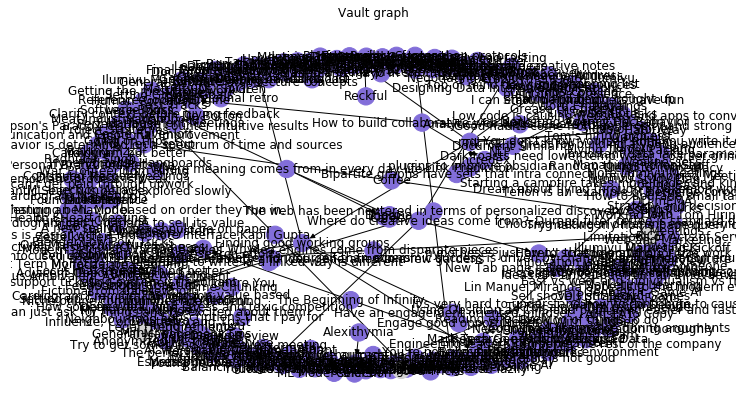

In [93]:
fig, ax = plt.subplots(figsize=(13,7))
nx.draw(vault.graph, node_color=color_vals, with_labels=True, ax=ax)
ax.set_title('Vault graph')
plt.show()

### Graph analysis

Where `obsidiantools` has the potential to be really powerful in your Obsidian workflows is its linkage with the sophisticated graph analysis capabilities of NetworkX.

There are many algorithms that you can use to analyse the **centrality** of nodes in a graph in NetworkX.

Let's look at the **PageRank** of notes in the vault.  Google has used PageRank to rank the importance of search engine results.

As outlined by Google:

>The underlying assumption is that more important websites are likely to receive more links from other websites

In the **Obsidian** realm, the notes that would be ranked highest by PageRank are the 'notes likely to receive more links from other notes', i.e. the notes that have **backlinks from a broad range of notes**.

Let's see this in action.

In [94]:
(pd.Series(nx.pagerank(vault.graph), name='pagerank')
 .sort_values(ascending=False))

Dharma                                                                    0.026671
Ikigai                                                                    0.026671
Word Embeddings                                                           0.011707
Document Similarity                                                       0.010974
Deep Work                                                                 0.010240
NLP                                                                       0.010111
Adjacent Opportunities                                                    0.009577
Incredex                                                                  0.009097
Mimicry                                                                   0.008137
Ideas are an output from an innovative process                            0.007991
Zettelkasten                                                              0.007577
You're not above the hype train                                           0.006911
inno

- `Caelum` has the highest rank in the main graph.  It has 3 backlinks from 3 notes.
- These notes have 0 backlinks and rank very low as a result:
    - `Isolated note` (of course!)
    - `Vulnera ubera`
    - `Alimenta`
    - `Sussudio`
- `Bacchus` has the most backlinks (5), but doesn't rank highest!  Why might that be?  Well, the quality of those backlinks are questionable.  There are 4 backlinks to the note from `Alimenta`, which has 0 backlinks.  See further analysis below on what those backlinks look like.

#### Low-quality backlinks

This is a peek at the plaintext of the files, which are only accessible after the GATHER function is called.  All the text is stored in the `text_index` of the vault.

In [95]:
last_lines_alimenta = (vault.get_text('Alimenta')
                       .splitlines()[-5:])

ValueError: "Alimenta" does not exist so it cannot have text.

In [96]:
for l in last_lines_alimenta:
    print(l)

NameError: name 'last_lines_alimenta' is not defined

Here we can see that there are a few repetitive wikilinks to `Bacchus` at the end of the file.  As it happens, all the other notes in this vault only link to another note once.  This is where the quality of backlinks matter to PageRank: notes don't rank high if they pile up backlinks from one note.